In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from datetime import datetime
from IPython.display import clear_output
import requests
import json
import calendar, time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# share_names = pd.read_csv(r"C:\Users\keshav1\Desktop\data2\Share_names_100.csv")
# share_names = list(share_names['Symbol'])
# len(share_names)


share_names = pd.read_csv(r"C:\Users\keshav1\Desktop\data2\Share_names_2000.csv")
share_names = list(share_names['Symbol'])
share_names = [i+".csv" for i in share_names]
len(share_names)

1913

In [3]:
# for share_name in share_names:
#     try:
#         locals()[share_name.replace('.csv','')] = pd.read_csv(r'C:\Users\keshav1\Desktop\data2\data\{}'.format(share_name))
#     except:
#         pass
#     time.sleep(0.05)


In [4]:
# read all files once

In [5]:
def get_data(share_name):
    
    file_name =r'C:\Users\keshav1\Desktop\data2\data\{}'.format(share_name)
    df = pd.read_csv(file_name)
    
#     df = eval(share_name.replace('.csv',''))
    
    return df
    

In [8]:
# sum_list = []
# for start in range(0,len(list_of_close_price_percentage),10):
#     sum_list = sum_list + [sum(list_of_close_price_percentage[start:start+10])]

In [9]:
# sum((sum_list >= sum_list[-1]))

In [10]:
# (sum_list >= sum_list[-1])[-1]

In [11]:
# #sum last 10 values
# sum_list = []
# for start in range(0,len(list_of_close_price_percentage),10):
#     sum_list = sum_list + [sum(list_of_close_price_percentage[start:start+10])]

# #sum of last 10 values should be greatest
# sum_list = np.array(sum_list[:-1])
# sum_list >= sum_list[-1]
# if sum((sum_list >= sum_list[-1])) == 1:
#     if (sum_list >= sum_list[-1])[-1]:
#         print('0')

In [12]:
def return_percentage(x):
    x_per_list = []
    for i in range(1,len(x)):
        x_per_list = x_per_list + [((x[i]-x[i-1])/x[i-1])*100]
    return x_per_list       

In [13]:
def return_percentage_considering_first_value_as_100(x):
    first_value = x[0]
    x_per_list = []
    for i in range(1,len(x)):
        x_per_list = x_per_list + [((x[i]-first_value)/first_value)*100]
    return x_per_list 

In [14]:
def rmse(predictions, targets):
    targets      = np.array(targets)
    predictions  = np.array(predictions)
    return np.sqrt(((predictions - targets) ** 2).mean())

In [15]:
# url = "https://tvc4.forexpros.com/cc204e76b176b3dc071e3d2dbecfc4f9/1609916501/1/1/8/history?symbol=18367&resolution=1&from=1500830365&to=1809916825"

# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) '
#                'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 '
#                'Safari/537.36'}

# res = requests.get(url,headers=headers)


# df = pd.DataFrame(res.json()).round(2)

# df['Date'] = pd.to_datetime(df['t']+5.5*60*60, unit='s')

# df

In [16]:
def tell_buy_or_sell_10_30_high_low_cross(dff,share_name):
    date_start = time.strftime("%Y/%m/%d ", time.localtime(time.time())) + "00:00:00"
    date_end   = time.strftime("%Y/%m/%d ", time.localtime(time.time())) + "10:30:00"
    
    # date_start = "2021/01/01 00:00:00"
    # date_end   = "2021/01/01 10:30:00"
    # print(date_start)
    # print(date_end)
    
    result = {"buy":False , "sell":False ,'buy_time':'','buy_time':'' , 'share_name':share_name}
    
    
    df = dff.loc[(dff['date'] > date_start) & (dff['date'] < date_end),:]
    
    if df.shape == 0:
        return result
        
    lower_limit = min(df['close'])
    upper_limit = max(df['close'])
    
    # print("lower_limit",lower_limit)
    # print("upper_limit",upper_limit)
    
    df2 = dff.loc[(dff['date'] > date_end),:].reset_index(drop=True)
    
    if any(df2['close'] > upper_limit):
        result['buy']=True
        result['buy_time'] = df2['date'][list((df2['close'] > upper_limit)*1).index(1)]
        
    if any(df2['close'] < upper_limit):
        result['sell']=True    
        result['sell_time'] = df2['date'][list((df2['close'] < upper_limit)*1).index(1)]
        
        
    return result


In [17]:
def render_mpl_table(data, col_width=15.0, row_height=0.625, font_size=8,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

In [18]:
def return_1(profit_dict,loss_dict,no_profit_loss_dict):
    
    share_names = [i.replace(".csv","") for i in profit_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
    
    startTime = [profit_dict[i] for i in profit_dict.keys() if "startTime" in i]
    endTime   = [profit_dict[i] for i in profit_dict.keys() if "endTime" in i]
    
    share_buy_price  = [profit_dict[i] for i in profit_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
    share_sell_price = [profit_dict[i] for i in profit_dict.keys() if "sell" in i ]
    
    profit_df = pd.DataFrame()
    profit_df['share_profit'] = share_names
    profit_df['startTime']    = startTime
    profit_df['endTime']      = endTime
    profit_df['status']       = ''
    
    profit_df['share_buy_price']     = share_buy_price
    profit_df['share_sell_price']    = share_sell_price


    
    
    
    
    

    share_names = [i.replace(".csv","") for i in loss_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
    
    startTime = [loss_dict[i] for i in loss_dict.keys() if "startTime" in i]
    endTime   = [loss_dict[i] for i in loss_dict.keys() if "endTime" in i]
    
    share_buy_price  = [loss_dict[i] for i in loss_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
    share_sell_price = [loss_dict[i] for i in loss_dict.keys() if "sell" in i ]
    
    loss_df = pd.DataFrame()
    loss_df['share_profit'] = share_names
    loss_df['startTime']    = startTime
    loss_df['endTime']      = endTime
    loss_df['status']       = ''
    
    loss_df['share_buy_price']     = share_buy_price
    loss_df['share_sell_price']    = share_sell_price    
    
    
    
    


    no_profit_loss_df = pd.DataFrame()
    if no_profit_loss_dict != {}:
        share_names = [i.replace(".csv","") for i in no_profit_loss_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
        
        startTime = [no_profit_loss_dict[i] for i in no_profit_loss_dict.keys() if "startTime" in i]
        endTime   = [no_profit_loss_dict[i] for i in no_profit_loss_dict.keys() if "endTime" in i]
        
        share_buy_price  = [no_profit_loss_dict[i] for i in no_profit_loss_dict.keys() if "startTime" not in i and "endTime" not in i and "sell" not in i]
        share_sell_price = [no_profit_loss_dict[i] for i in no_profit_loss_dict.keys() if "sell" in i ]        
        
        no_profit_loss_df = pd.DataFrame()
        no_profit_loss_df['share_profit'] = share_names
        no_profit_loss_df['startTime']    = startTime
        no_profit_loss_df['endTime']      = endTime
        no_profit_loss_df['status']       = ''

        no_profit_loss_df['share_buy_price']     = share_buy_price
        no_profit_loss_df['share_sell_price']    = share_sell_price  
        # no_profit_loss_dict

    final_df = pd.concat([profit_df,loss_df,no_profit_loss_df]).sort_values("startTime").reset_index(drop=True)
    return final_df    

1.6

In [122]:
def return_2(final_df,max_loss_is_limited):
    
    final_df['%'] = ((final_df['share_sell_price'] - final_df['share_buy_price'])/final_df['share_buy_price'])    
        
    #final_df.loc[final_df['%'] < max_loss_is_limited,'%'] = -max_loss_is_limited
    
#     for i in range(0,final_df.shape[0]):
        
#         if final_df['%'][i] < 0:
            
#             final_df['%'][i] = -max_loss_is_limited/100
            
            
    
    minutes_list = []
    for i in range(0,final_df.shape[0]):
        s = final_df['startTime'][i]
        e = final_df['endTime'][i]
        minutes = (calendar.timegm(time.strptime(e, '%Y/%m/%d %H:%M:%S')) - calendar.timegm(time.strptime(s, '%Y/%m/%d %H:%M:%S')))/60
        minutes_list = minutes_list + [minutes]

    final_df['minutes'] = minutes_list
    return final_df    

In [108]:
def return_3(final_df):
    for i in range(1,final_df.shape[0]):

        if final_df['minutes'][0] > 20:
            s = final_df['startTime'][0]
            endTime = calendar.timegm(time.strptime(s, '%Y/%m/%d %H:%M:%S')) + minutes_limit_for_any_trade * 60 -5.5*60*60
            final_df['endTime'][0] = time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(endTime))
            #final_df['status'][0]  = 'closed' 
            


        if final_df['minutes'][i] > 20:
            #close transaction
            #add fake loss
            s = final_df['startTime'][i]
            endTime = calendar.timegm(time.strptime(s, '%Y/%m/%d %H:%M:%S')) + minutes_limit_for_any_trade * 60 -5.5*60*60
            final_df['endTime'][i] = time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(endTime))
            #final_df['status'][i]  = 'closed'


    # s='2021/01/07 03:24:01'
    # time.strftime("%Y/%m/%d %H:%M:%S", time.localtime(calendar.timegm(time.strptime(s, '%Y/%m/%d %H:%M:%S'))-5.5*60*60))        
    
    
    for i in range(0,final_df.shape[0]):
        
        if final_df['%'][i] > 0:
            final_df['status'][i] = 'profit'
            
        elif final_df['%'][i] < 0:
            final_df['status'][i] = 'loss'    
            
        elif final_df['%'][i] == 0:
            final_df['status'][i] = 'nill'  
            
        
        
            
    
    
    
    return final_df

In [109]:
def return_4(final_df):
    
    #get time in correct order
    small_df = final_df.head(1)

    for i in range(1,final_df.shape[0]):
        #any startTime is greater than n-1(endTime)  delete that row

        endTime = list(small_df['endTime'])[-1]

        if  (final_df['startTime'][i]) > (endTime):
            small_df = pd.concat([small_df,final_df.iloc[[i],:]],axis=0)

    small_df = small_df.reset_index(drop=True)

    
    
    

    #add amount
    small_df['amount'] = int((1+(small_df['%'][0]/100)) * 100000)
    for i in range(1,small_df.shape[0]):                
        small_df['amount'][i] = int((1+(small_df['%'][i]/100)) * small_df['amount'][i-1])

    return small_df


In [110]:
def return_5(final_df,image_save_path,tax):
    
    final_df['%'] = round(final_df['%'] * 100,2)
    
    #add amount
    final_df['amount'] = int((1+(final_df['%'][0]/100)) * 100000) - tax
    for i in range(1,final_df.shape[0]):                
        final_df['amount'][i] = int((1+(final_df['%'][i]/100)) * final_df['amount'][i-1])    
    
    fig,ax = render_mpl_table(final_df, header_columns=0, col_width=2.0)
    path_to_save_image = ""
    for i in image_save_path.split("\\")[:-1]:
        path_to_save_image = path_to_save_image + "\\"+i
    path_to_save_image = path_to_save_image + "\\"
    path_to_save_image = path_to_save_image + "table_mpl.png"
    path_to_save_image = path_to_save_image.replace("\C","C")
    fig.savefig(path_to_save_image) 

    path_to_save_csv = path_to_save_image.replace(".png",".csv")    
    final_df.to_csv(path_to_save_csv)   
    
    return final_df
    

In [111]:
date_start_filter_list = ['1/4/2021','1/5/2021']

In [112]:
# for number in range(1,len(date_start_filter_list)):
    
#     date_start = date_start_filter_list[number-1]
#     date_end   = date_start_filter_list[number] 

#     print(date_start,date_end)
    
#     for share_name in share_names:
#         #print(share_name)
        
#         time.sleep(0.01)

#         try:
            
#             file_name =r'C:\Users\keshav1\Desktop\data2\data\{}'.format(share_name)
#             df_all_day_data = pd.read_csv(file_name)   
            
#         except:
#             pass

#         df = df_all_day_data.loc[(df_all_day_data['date'] > date_start) & (df_all_day_data['date'] < date_end),:]

#         #print(df_all_day_data.shape)

#         if df.shape[0] < 10:
#             continue

#         df = df.tail(700).reset_index(drop=True)

#         x = list(df['close'])    
#         list_of_close_price_percentage = return_percentage_considering_first_value_as_100(x)

#         name = date_start+"_to_"+date_end+"_"+str(share_name)
#         name = name.replace(" ","").replace("/","_").replace(":","_").replace("csv","png").replace("0","").replace("___","_")



#         plt.figure(figsize=(15,10))
#         plt.title(name) 
#         plt.plot(list_of_close_price_percentage)
#         plt.ylim(-12,12)
#         percentage_mark = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,1,2,3,4,5,6,7,8,9,10]
#         for per in percentage_mark:
#             plt.axhline(per,color='orange')        

#         #print(name)
#         folder_name = date_start.replace(" 00:00:00","").replace("/","_")
#         name = share_name+".png"
#         save_path = r'C:\Users\keshav1\Desktop\image_parakh\all\{}\{}'.format(folder_name,name)
#         #print(save_path)
#         plt.savefig(save_path)
#         plt.close()
#         #plt.show()





In [36]:
# sell_if_share_price_percent_drops_by    = 3
# sell_if_share_price_percent_increase_by = 1.5


# rmse_value_filter = 0.5
# diff_sould_be_more_than_value_filter = 3.5
# fileter_mean_values_greater_than     = 1.25
# number_of_points            = 11 #number of points
# minutes_limit_for_any_trade = 20



In [38]:
date_start_filter_list = [
                          "2020/12/20 00:00:00",
                          "2020/12/21 00:00:00",
                          "2020/12/22 00:00:00",
                          "2020/12/23 00:00:00",
                          "2020/12/24 00:00:00",
                          "2020/12/28 00:00:00",
                          "2020/12/29 00:00:00",
                          "2020/12/30 00:00:00",
                          "2020/12/31 00:00:00",
                          "2021/01/01 00:00:00",
                          "2021/01/02 00:00:00",
                          "2021/01/03 00:00:00",
                          "2021/01/04 00:00:00",
                          "2021/01/05 00:00:00",
                          "2021/01/06 00:00:00",
                          "2021/01/07 00:00:00",
                          "2021/01/08 00:00:00",
                          "2021/01/09 00:00:00"]

In [123]:
date_start_filter_list = [
    
    "2021/01/04 00:00:00",
    "2021/01/05 00:00:00"
    
]

In [124]:
delete_all_test = True
if delete_all_test:
    for date_start_filter in date_start_filter_list:
        try:
            folder_name = date_start_filter.replace(" 00:00:00","").replace("/","_")
            mydir = r'C:\Users\keshav1\Desktop\image_parakh\test\{}'.format(folder_name)      
            filelist = [ f for f in os.listdir(mydir) ]
            for f in filelist:
                os.remove(os.path.join(mydir, f)) 
        except:
            pass

In [125]:
#                                                #difference check                   
# diff_sould_be_more_than_value_filter_list    = [3.5  ,3.75 ,4   ,4.25 ,4.5  ,5  ]  + [3.5  ,3.5 ,3.5   ,3.5 ,3.5  ,3.5 ] + [3.5  ,3.5 ,3.5   ,3.5 ,3.5  ,3.5 ]
#                                                                                             #minutes check
# minutes_limit_for_any_trade_list             = [ 20   ,20   ,20  ,20   ,20  ,20  ] + [ 10   ,15   ,20  ,25   ,30  ,35  ] + [ 20   ,20   ,20  ,20   ,20  ,20  ]
#                                                                                                                                 #number of points
# number_of_points_list                        = [ 11   ,11   ,11  ,11   ,11  ,11  ] + [ 11   ,11   ,11  ,11   ,11  ,11  ] + [ 11   ,13   ,16  ,18   ,21  ,25  ]



#                                             # same 
# sell_if_share_price_percent_drops_by_list    = [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ] + [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ] + [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ]
# sell_if_share_price_percent_increase_by_list = [ 1    ,1    ,1   ,1    ,1   ,1   ] + [ 1    ,1    ,1   ,1    ,1   ,1   ] + [ 1    ,1    ,1   ,1    ,1   ,1   ]
# rmse_value_filter_list                       = [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ] + [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ] + [ 0.5  ,0.5  ,0.5 ,0.5  ,0.5 ,0.5 ]
# fileter_mean_values_greater_than_list        = [ 1.5  ,1.5  ,1.5 ,1.5  ,1.5 ,1.5 ] + [ 1.5  ,1.5  ,1.5 ,1.5  ,1.5 ,1.5 ] + [ 1.5  ,1.5  ,1.5 ,1.5  ,1.5 ,1.5 ]


In [126]:

#                                                     #difference check                   
# diff_sould_be_more_than_value_filter_list    = [3.5  ,3.75 ,4   ,4.25 ,4.5  ,5  ]  + [3.5]*21                             + [3.5]*6
#                                                                                             #minutes check
# minutes_limit_for_any_trade_list             = [20]*6                              + [ 10 ,13  ,15 ,18  ,20 ,23  ,25,27  ,30 ,32 ,35 ,37 , 40 , 42 , 45 , 47 ,50 ,52,55 ,60 ,65  ] + [20]*6  
#                                                                                                                                 #number of points
# number_of_points_list                        = [11]*6                              + [11]*21                              + [ 11   ,13   ,16  ,18   ,21  ,25  ]



#                                             # same 
# sell_if_share_price_percent_drops_by_list    = [0.5]*6                              + [0.5 ]*21                            + [0.5]*6
# sell_if_share_price_percent_increase_by_list = [1.5]*6                              + [1.5 ]*21                            + [1.5]*6
# rmse_value_filter_list                       = [0.5]*6                              + [0.5 ]*21                            + [0.5]*6
# fileter_mean_values_greater_than_list        = [1.5]*6                              + [1.5 ]*21                            + [1.5]*6


In [127]:

# diff_sould_be_more_than_value_filter_list    = [2  ,3     ,4    ,5]
                                                                                            
# minutes_limit_for_any_trade_list             = [60 ,60    ,60  ,60]
                                                                                                    
# number_of_points_list                        = [3, 3,   3   ,3]                             



#                                             # same
# sell_if_share_price_percent_increase_by_list = [1.5,  1.5, 1.5, 1.5 ]    
# sell_if_share_price_percent_drops_by_list    = [3 ,5, 5, 5   ] 
# rmse_value_filter_list                       = [1 ,1, 1, 1]
# fileter_mean_values_greater_than_list        = [1.5 , 1.5, 1.5, 1.5 ] 

In [128]:

diff_sould_be_more_than_value_filter_list    = [2]  
                                                                                            
minutes_limit_for_any_trade_list             = [30 ]
                                                                                                    
number_of_points_list                        = [20]                             



                                            # same
sell_if_share_price_percent_increase_by_list = [3 ]    
sell_if_share_price_percent_drops_by_list    = [1.6  ] 
rmse_value_filter_list                       = [1 ]
fileter_mean_values_greater_than_list        = [1.5  ] 


max_share_price = 5000
min_share_price = 50

limit_number_of_transactions = 1

In [129]:
# sell_if_share_price_percent_drops_by    = 3
# sell_if_share_price_percent_increase_by = 1.5


# rmse_value_filter = 0.5
# diff_sould_be_more_than_value_filter = 3.5
# fileter_mean_values_greater_than     = 1.25
# number_of_points            = 11 #number of points
# minutes_limit_for_any_trade = 20

In [130]:
score_list = []

iterationNumber 0


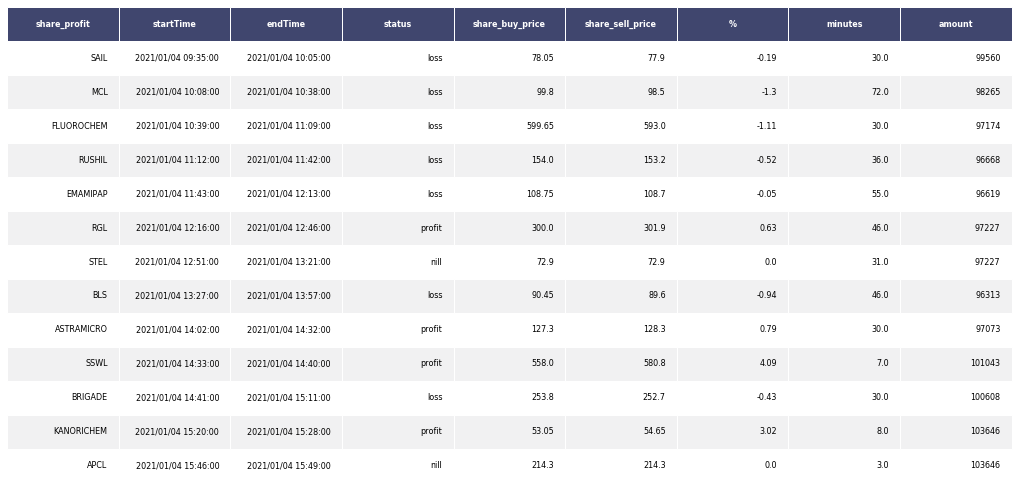

<Figure size 1296x720 with 0 Axes>

In [131]:
for iterationNumber in range(0,len(sell_if_share_price_percent_drops_by_list)):
    
#     if not ((iterationNumber > -1) & (iterationNumber < 1)):
#         continue

    sell_if_share_price_percent_drops_by    = sell_if_share_price_percent_drops_by_list[iterationNumber]
    sell_if_share_price_percent_increase_by = sell_if_share_price_percent_increase_by_list[iterationNumber]
    rmse_value_filter                       = rmse_value_filter_list[iterationNumber]
    diff_sould_be_more_than_value_filter    = diff_sould_be_more_than_value_filter_list[iterationNumber]
    fileter_mean_values_greater_than        = fileter_mean_values_greater_than_list[iterationNumber]
    number_of_points                        = number_of_points_list[iterationNumber]
    minutes_limit_for_any_trade             = minutes_limit_for_any_trade_list[iterationNumber]

    print("iterationNumber",iterationNumber)
    
#     print("sell_if_share_price_percent_drops_by"   ,sell_if_share_price_percent_drops_by)
#     print("sell_if_share_price_percent_increase_by",sell_if_share_price_percent_increase_by)
#     print("rmse_value_filter"                      ,rmse_value_filter)
#     print("diff_sould_be_more_than_value_filter"   ,diff_sould_be_more_than_value_filter)
#     print("fileter_mean_values_greater_than"       ,fileter_mean_values_greater_than)
#     print("number_of_points"                       ,number_of_points)
#     print("minutes_limit_for_any_trade"            ,minutes_limit_for_any_trade)

    change_of_days = []
    days           = []
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    for number in range(1,len(date_start_filter_list)):
        
        
        date_start = date_start_filter_list[number-1]
        date_end   = date_start_filter_list[number]

        profit_dict         = {}
        loss_dict           = {}
        no_profit_loss_dict = {}   

        for share_name in share_names:    

            try:
                df_all_day_data = get_data(share_name)
            except:
                continue
                pass                 


            df = df_all_day_data.loc[(df_all_day_data['date'] > date_start) & (df_all_day_data['date'] < date_end),:]

            if df.shape[0] < 10:
                continue

            df = df.tail(700).reset_index(drop=True)




            #detect if share is going up        
            list_of_close_price                 = list(df['close'])    
            signal_index_list                   = [0] #elist
            list_of_close_price_percentage      = return_percentage_considering_first_value_as_100(list_of_close_price)
            list_of_close_price_percentage_sign = [np.sign(j) for j in list_of_close_price_percentage]



            for i in range(number_of_points,len(list_of_close_price_percentage),1):

                end                   = i
                start                 = end  - number_of_points
                previous_values       = list_of_close_price_percentage[start:end]
                previous_sign         = list_of_close_price_percentage_sign[start:end]
                previous_sign_sum     = sum(previous_sign)

                #add positive logic 
                if previous_sign_sum >= (number_of_points-5) :

                    #add unique logic
                    if end > list_of_close_price_percentage[-1]:   
                        #print(e)      

                        if end > 300:
                            continue                                            

                        #add certain threshold 
                        fileter_mean = sum(previous_values)/len(previous_values)  
                        #print("fileter_mean",fileter_mean)

                        if fileter_mean > fileter_mean_values_greater_than:

                            #add increasing logic              
                            m                        = previous_values
                            slope                    = (((max(m)-min(m)))/number_of_points)
                            ideal_45_degree_plot     = [min(m)] + [(slope*i)+min(m) for i in range(1,number_of_points-1)] + [max(m)]                
                            rmse_value = rmse(ideal_45_degree_plot, previous_values)  
                            diff = max(m)-min(m)

                            #limit rmse
                            if rmse_value <= rmse_value_filter and diff > diff_sould_be_more_than_value_filter:

                                next_cycle = end + 1
                                buying_price = list(df['close'])[next_cycle]

                                #limit price
                                if buying_price > min_share_price and buying_price < max_share_price:

                                    #limit only one signal per share (update)
                                    if len(signal_index_list) < 2:
                                        signal_index_list = signal_index_list + [next_cycle] 

            #remove zero.
            del signal_index_list[signal_index_list.index(0)]



            if len(signal_index_list) > 0:

                name = date_start+"_to_"+date_end+"_"+str(share_name)
                name = name.replace(" ","").replace("/","_").replace(":","_").replace("csv","png").replace("0","").replace("___","_")                        
                folder_name = date_start.replace(" 00:00:00","").replace("/","_")


                plt.figure(figsize=(15,10))
                plt.title(name) 
                plt.plot(list_of_close_price_percentage)
                #list_of_volume_percentage      = return_percentage_considering_first_value_as_100(list(df['volume']))
                #plt.plot(list_of_volume_percentage)
                plt.ylim(-12,12)
                percentage_mark = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,1,2,3,4,5,6,7,8,9,10]
                for per in percentage_mark:
                    plt.axhline(per,color='orange')



                for index_number in range(0,len(signal_index_list)):

                    big_value = 1000000
                    profit_index , loss_index   = big_value , big_value

                    #i - index_number
                    #e - index

                    index = signal_index_list[index_number]
                    t     = df['date'][index]
                    try:
                        p     = list_of_close_price_percentage[index]   
                    except:
                        p     = list_of_close_price_percentage[index-1] 


                    plt.title(name+" time = {} percentage = {}".format(t,p))
                    plt.axvline(index,color='black')


                    lower_limit_after_gain     = list_of_close_price[index] - ((sell_if_share_price_percent_drops_by   *list_of_close_price[index])/100)
                    upper_limit_after_gain     = list_of_close_price[index] + ((sell_if_share_price_percent_increase_by*list_of_close_price[index])/100)

                    sample_df = pd.DataFrame({"close":list_of_close_price[index:index+minutes_limit_for_any_trade] })                 

                    profit , loss = False , False
                    profit = any(sample_df['close'] > upper_limit_after_gain)
                    loss   = any(sample_df['close'] < lower_limit_after_gain)



                    if profit:

                        name =  "_profit_" +name
                        minutes = list((sample_df['close'] > upper_limit_after_gain )*1).index(1)
                        profit_index = index + minutes
                        plt.axvline(profit_index,color='green')
                        text ="profit after {} minutes".format(minutes) 
                        plt.xlabel(text)
                        #print(text)    

                        #name-price
                        profit_dict[share_name]               = list(df['close'])[index]
                        profit_dict[share_name+"_startTime"]  = list(df['date'])[index]
                        profit_dict[share_name+"_endTime"]    = list(df['date'])[profit_index]
                        profit_dict[share_name+"_sell_price"] = list(df['close'])[profit_index]


                    elif loss:

                        name =  "_loss_" + name
                        minutes = list((sample_df['close'] < lower_limit_after_gain )*1).index(1)
                        loss_index = index + minutes
                        plt.axvline(loss_index,color='red')
                        text = "loss after {} minutes".format(minutes)
                        #print(text)
                        plt.xlabel(text) 

                        #name-price
                        loss_dict[share_name]              = list(df['close'])[index] 
                        loss_dict[share_name+"_startTime"] = list(df['date'])[index]
                        loss_dict[share_name+"_endTime"]   = list(df['date'])[loss_index]
                        loss_dict[share_name+"_sell_price"] = list(df['close'])[loss_index]






                    else:
                        no_profit_loss_dict[share_name]               = list(df['close'])[index] 
                        no_profit_loss_dict[share_name+"_startTime"]  = list(df['date'])[index]
                        try:
                            no_profit_loss_dict[share_name+"_endTime"]    = list(df['date'])[index+minutes_limit_for_any_trade]  
                            no_profit_loss_dict[share_name+"_sell_price"] = list(df['close'])[index+minutes_limit_for_any_trade]
                        except:
                            no_profit_loss_dict[share_name+"_endTime"]    = list(df['date'])[-1]  
                            no_profit_loss_dict[share_name+"_sell_price"] = list(df['close'])[-1]                        



                    image_save_path = r'C:\Users\keshav1\Desktop\image_parakh\test\{}\{}'.format(folder_name,name)
                    plt.savefig(image_save_path)
                    plt.close()                
                    break



        final_df_1 = return_1(profit_dict,loss_dict,no_profit_loss_dict)#merge        

        if final_df_1.shape[0] > 0:

            final_df_2 = return_2(final_df_1,sell_if_share_price_percent_drops_by)#add minutes col

            final_df_3 = return_3(final_df_2)#add status
            
            tax = 250

            final_df_4 = return_4(final_df_3)#add amount 

            final_df_5 = return_5(final_df_4,image_save_path,tax) 
            
            change_of_day = final_df_5.tail(1)['amount'].values[0] - 100000
            
            #print("change_of_day",change_of_day)
            change_of_day = change_of_day - final_df_5.shape[0] * tax
            #print("change_of_day",change_of_day)            

            change_of_days = change_of_days + [change_of_day]
            days           = days           + [date_start.replace(" 00:00:00","")]
            

    if len(change_of_days) > 0:
        score_list     = score_list + [sum(change_of_days)]
        plt.figure(figsize=(18,10))
        my_df = pd.DataFrame({"days":days,"change_of_days":change_of_days})
        my_df.plot(x='days', y='change_of_days', kind='bar') 
        plt.ylim(-10000,10000)
        plt.savefig(r'C:\Users\keshav1\Desktop\image_parakh\test\config_results\{}.png'.format(iterationNumber))
        plt.close()    


In [132]:
get_best_trade_per  = []
get_best_trade_name = []

for iterationNumber in range(0,len(sell_if_share_price_percent_drops_by_list)):
    
#     if not ((iterationNumber > -1) & (iterationNumber < 1)):
#         continue

    sell_if_share_price_percent_drops_by    = sell_if_share_price_percent_drops_by_list[iterationNumber]
    sell_if_share_price_percent_increase_by = sell_if_share_price_percent_increase_by_list[iterationNumber]
    rmse_value_filter                       = rmse_value_filter_list[iterationNumber]
    diff_sould_be_more_than_value_filter    = diff_sould_be_more_than_value_filter_list[iterationNumber]
    fileter_mean_values_greater_than        = fileter_mean_values_greater_than_list[iterationNumber]
    number_of_points                        = number_of_points_list[iterationNumber]
    minutes_limit_for_any_trade             = minutes_limit_for_any_trade_list[iterationNumber]

    print("iterationNumber",iterationNumber)


    change_of_days = []
    days           = []
    
    for number in range(1,len(date_start_filter_list)):
        
        
        date_start = date_start_filter_list[number-1]
        date_end   = date_start_filter_list[number]

        profit_dict         = {}
        loss_dict           = {}
        no_profit_loss_dict = {}   

        for share_name in share_names:    

            try:
                df_all_day_data = get_data(share_name)
            except:
                continue
                pass                 


            df = df_all_day_data.loc[(df_all_day_data['date'] > date_start) & (df_all_day_data['date'] < date_end),:]

            if df.shape[0] < 10:
                continue

            df = df.tail(700).reset_index(drop=True)


            #detect if share is going up        
            list_of_close_price                 = list(df['close'])    
            signal_index_list                   = [0] #elist
            list_of_close_price_percentage      = return_percentage_considering_first_value_as_100(list_of_close_price)
            get_best_trade_per  = get_best_trade_per  + [get_best_trade_per]
            get_best_trade_name = get_best_trade_name + [sum(list_of_close_price_percentage[-40:])]
            



iterationNumber 0


In [ ]:
df = pd.DataFrame({"share_name":get_best_trade_name,"%":get_best_trade_per})

In [ ]:
df

In [ ]:
# 5 min 50-200

In [ ]:
# df_results = pd.DataFrame({"difference"              :diff_sould_be_more_than_value_filter_list,
#                            "minutes"                 :minutes_limit_for_any_trade_list,
#                            "number_of_points"        :minutes_limit_for_any_trade_list,
#                            "sell_at_percent_drops"   :sell_if_share_price_percent_drops_by_list,
#                            "sell_at_percent_increase":sell_if_share_price_percent_increase_by_list,
#                            "rmse_value"              :rmse_value_filter_list,
#                            "fileter_mean"            :fileter_mean_values_greater_than_list,
#                           })

In [ ]:
# df_results['score'] = score_list

In [ ]:
# df_results

In [919]:
# a = 100000
# for i in range(0,22):
#     a = a*1.02
# a

In [2]:
date_start = '2020/12/21 00:00:00'
date_end   = '2020/12/22 00:00:00' 

share_name = 'TIPSINDLTD.csv'

share_names = [share_name]

In [ ]:
dff = pd.read_csv(r'C:\Users\keshav1\Desktop\data2\data\{}'.format(share_name))

In [3]:
# actual_list

In [8]:
for share_name in share_names:
    

    try:
        dff = pd.read_csv(r'C:\Users\keshav1\Desktop\data2\data\{}'.format(share_name))
    except:
        pass
    
    df = dff.loc[(dff['date'] > date_start) & (dff['date'] < date_end),:].tail(700).reset_index(drop=True)
    
    x = list(df['close'])    

    if len(x) < 200:
        continue
        
    print("\n\n\n\n\n\n\n\n\n\n")    
    
    actual_list = return_percentage_considering_first_value_as_100(x)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_axes([1,1,1,1])
    langs = [str(i) for i in range(0,len(actual_list))]
    students = actual_list
    ax.bar(langs,students)
    plt.ylim(-5,20)

    for i in range(-4,20):
        plt.axhline(i,color='red')

    plt.show()

     

[]

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(actual_list)


# actual_list_increasing = [0]
# for i in range(1,len(actual_list)):
#     if actual_list[i] > actual_list_increasing[-1]:
#         actual_list_increasing = actual_list_increasing + [actual_list[i]]
#     else:
#         actual_list_increasing = actual_list_increasing + [actual_list_increasing[-1]]
# plt.figure(figsize=(20,10))
# plt.plot(actual_list_increasing)        
# plt.show()  